In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier  #GBM 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
hr = pd.read_csv("data/processed_data.csv")
hr = hr.drop(["Unnamed: 0"], axis=1)
target = "Attrition_Yes"
hr.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.547619,0.715820,0.000000,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,...,1,0,0,0,0,1,1,0,0,0
1,0.738095,0.126700,0.250000,0.000484,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,...,0,0,0,1,1,0,0,0,1,0
2,0.452381,0.909807,0.035714,0.001451,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,...,0,1,0,0,0,1,0,0,1,0
3,0.357143,0.923407,0.071429,0.001935,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,...,0,0,1,0,0,1,0,0,1,0
4,0.214286,0.350036,0.035714,0.002903,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,...,0,0,0,1,1,0,0,0,1,0


In [3]:
hr.shape

(1470, 80)

In [4]:
# split train test
hr_labels = hr['Attrition_Yes']
hr = hr.drop(['Attrition_Yes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(hr, hr_labels, test_size=0.3, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 79)
(441, 79)
(1029,)
(441,)


## Logistics Regression

In [5]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9024943310657596


[[364   6]
 [ 37  34]]


Text(0.5,1,'Accuracy Score: 0.9024943310657596')

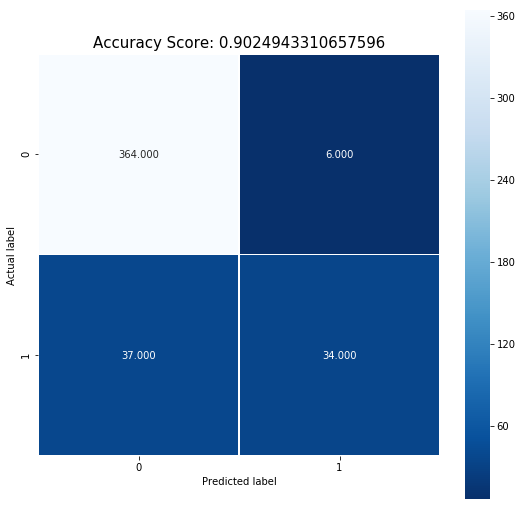

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## Logistic Prameter tuning(penalty L1 norm)

In [7]:
from sklearn.metrics import accuracy_score

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    lr_tuning = LogisticRegression(penalty = 'l1', C = i)
    lr_tuning.fit(X_train,y_train)
    y_pred = lr_tuning.predict(X_test)
    acc_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1

acc_table

,C_parameter,Accuracy
0,0.001,0.839002
1,0.010,0.839002
2,0.100,0.857143
3,1.000,0.897959
4,10.000,0.893424
5,100.000,0.891156


## Logistic Prameter tuning(penalty L2 norm)

In [8]:
from sklearn.metrics import accuracy_score

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    lr_tuning = LogisticRegression(penalty = 'l2', C = i)
    lr_tuning.fit(X_train,y_train)
    y_pred = lr_tuning.predict(X_test)
    acc_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1

acc_table

,C_parameter,Accuracy
0,0.001,0.839002
1,0.010,0.839002
2,0.100,0.888889
3,1.000,0.902494
4,10.000,0.895692
5,100.000,0.891156


## Gradient Boosting Method

Accuracy of the GBM on test set: 0.871
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       370
          1       0.68      0.38      0.49        71

avg / total       0.86      0.87      0.86       441



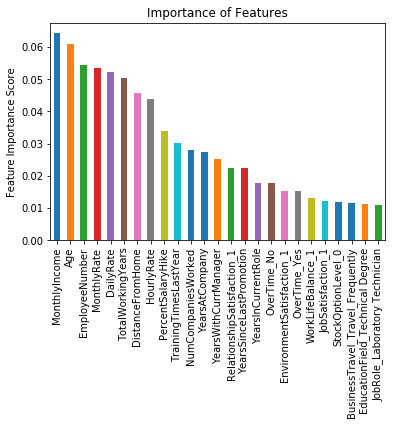

In [15]:
# GBM base model
# Base parameter setting
# n_estimators: The number of boosting stages to perform. 
base_args = {'max_depth': 3, 'n_estimators': 500, 'subsample': 1, 'random_state': 12,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}

base_model = GradientBoostingClassifier(learning_rate=0.1,**base_args)
base_model.fit(X_train,y_train)
predictors=list(X_train)

# Feature importance Top 10
feat_imp = pd.Series(base_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:25].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(base_model.score(X_test, y_test)))
pred=base_model.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.864
             precision    recall  f1-score   support

          0       0.89      0.96      0.92       370
          1       0.63      0.37      0.46        71

avg / total       0.85      0.86      0.85       441



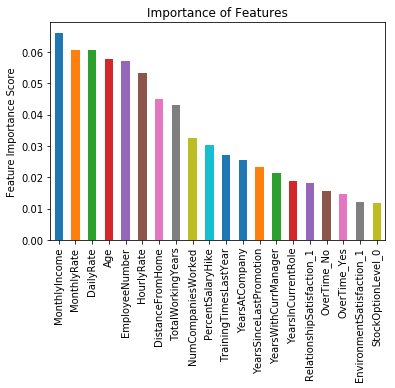

In [13]:
# Model Evaluation
model1_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1500, **base_args)
model1.fit(X_train,y_train)
predictors=list(X_train)

# Feature Importance
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:20].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.868
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       370
          1       0.68      0.35      0.46        71

avg / total       0.85      0.87      0.85       441



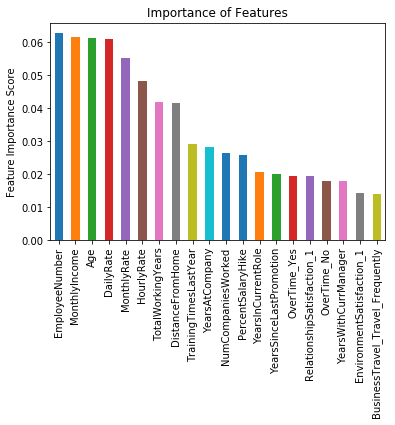

In [18]:
# Model Evaluation
base_args = {'learning_rate': 0.05, 'n_estimators': 750, 'max_depth': 3, 'subsample': 1, 'random_state': 2,
            'max_features':'sqrt'}
model2 = GradientBoostingClassifier(min_samples_leaf=1, min_samples_split=2, **base_args)
model2.fit(X_train,y_train)
predictors=list(X_train)

# Feature Importance
feat_imp = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:20].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(model2.score(X_test, y_test)))
pred=model2.predict(X_test)
print(classification_report(y_test, pred))

In [10]:
# Tunning Hyperparameters - Learning rate and estimators
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(**base_args), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.86400, std: 0.01780, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.87276, std: 0.01883, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.86884, std: 0.01153, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.87175, std: 0.01097, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.86884, std: 0.01230, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.86981, std: 0.01355, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.86981, std: 0.01355, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.86981, std: 0.01355, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.86300, std: 0.01008, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.86299, std: 0.01104, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.86688, std: 0.00815, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.86980, std: 0.01432, params: {'learning_rate': 0.1, 'n

In [11]:
# Model evaluation
pred=tuning.predict(X_test)
print('Accuracy of the GBM on test set: {:.3f}'.format(tuning.score(X_test, y_test)))
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.871
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       370
          1       0.66      0.41      0.50        71

avg / total       0.86      0.87      0.86       441



In [16]:
# Tuning parameters - min sample splits, min sample leaf
base_args = {'learning_rate': 0.1, 'n_estimators': 1500, 'max_depth': 3, 'subsample': 1, 'random_state': 2,
            'max_features':'sqrt'}
p_test = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(**base_args), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.87078, std: 0.01617, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.87271, std: 0.01406, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.87465, std: 0.01793, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.87077, std: 0.02122, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.87369, std: 0.01316, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.86785, std: 0.01506, params: {'min_samples_leaf': 1, 'min_samples_split': 20},
  mean: 0.86494, std: 0.01588, params: {'min_samples_leaf': 1, 'min_samples_split': 40},
  mean: 0.86203, std: 0.01141, params: {'min_samples_leaf': 1, 'min_samples_split': 60},
  mean: 0.86202, std: 0.01446, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.86883, std: 0.01447, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.86883, std: 0.01447, params: {'min_samples_leaf': 3, 'min_samples_split': 4},
  mean: 0.86883, std: 0.01

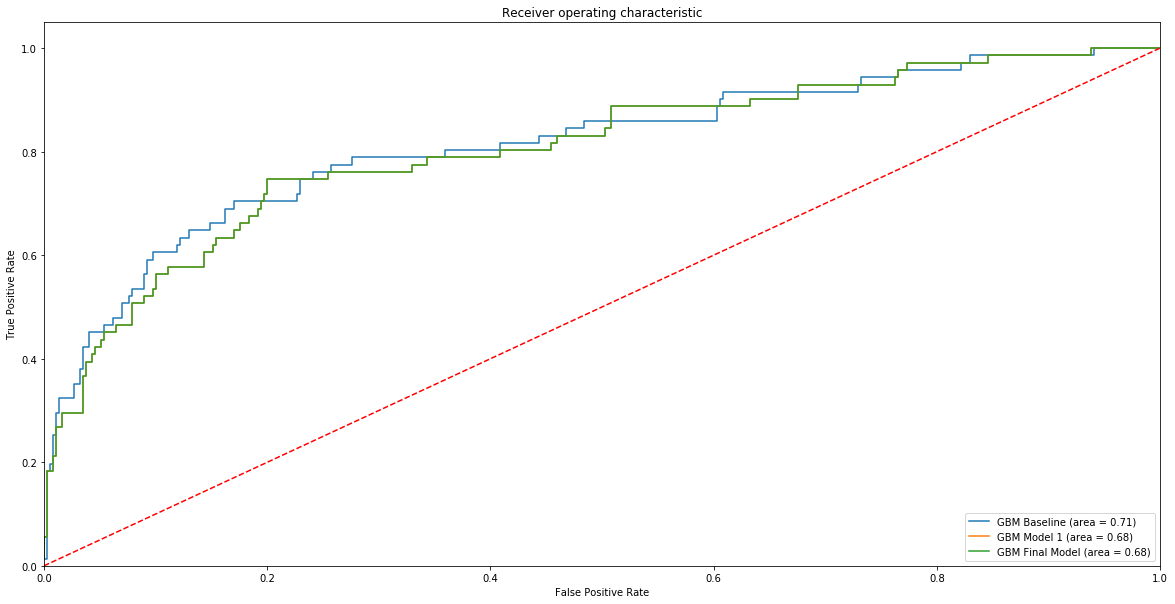

In [19]:
# Comparison of ROC AUC
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

# base
base_model_args = {'max_depth': 3, 'n_estimators': 500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
base_model = GradientBoostingClassifier(learning_rate=0.1, **base_model_args)
base_model.fit(X_train,y_train)

# learning rate, estimators
model1_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model1 = GradientBoostingClassifier(**model1_args)
model1.fit(X_train,y_train)

# sample split, leaf
model2_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model2=GradientBoostingClassifier(**model2_args)
model2.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
base_roc_auc = roc_auc_score(y_test, base_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, base_model.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
model2_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.figure(figsize=(20,10))
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % base_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % model2_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [43]:
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
SVM_grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=10)
SVM_grid_search.fit(X_train, y_train)
SVM_grid_search.predict(X_test)
print('Accuracy of the GBM on test set: {:.3f}'.format(SVM_grid_search.score(X_test, y_test)))
pred=SVM_grid_search.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.884
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       370
          1       0.79      0.38      0.51        71

avg / total       0.88      0.88      0.87       441



In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = SVM_grid_search.score(X_test, y_test)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## XGBoost

In [21]:
import xgboost as xgb

In [22]:
xgb_model = xgb.XGBClassifier()
params = {'learning_rate': [0.01, 0.05, 0.001],'max_depth': [6, 7, 8, 9], 'n_estimators': [5, 10, 100, 1000], 'seed': [12]}

In [37]:
xg_clf = GridSearchCV(xgb_model, params, n_jobs=5,  
                       scoring='roc_auc',
                       verbose=2, refit=True)

In [38]:
xg_clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    7.6s
[Parallel(n_jobs=5)]: Done 144 out of 144 | elapsed:   36.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=5,
       param_grid={'learning_rate': [0.01, 0.05, 0.001], 'max_depth': [6, 7, 8, 9], 'n_estimators': [5, 10, 100, 1000], 'seed': [12]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [39]:
y_pred = xg_clf.predict(X_test)
score =  accuracy_score(y_test, y_pred)
score

C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8526077097505669

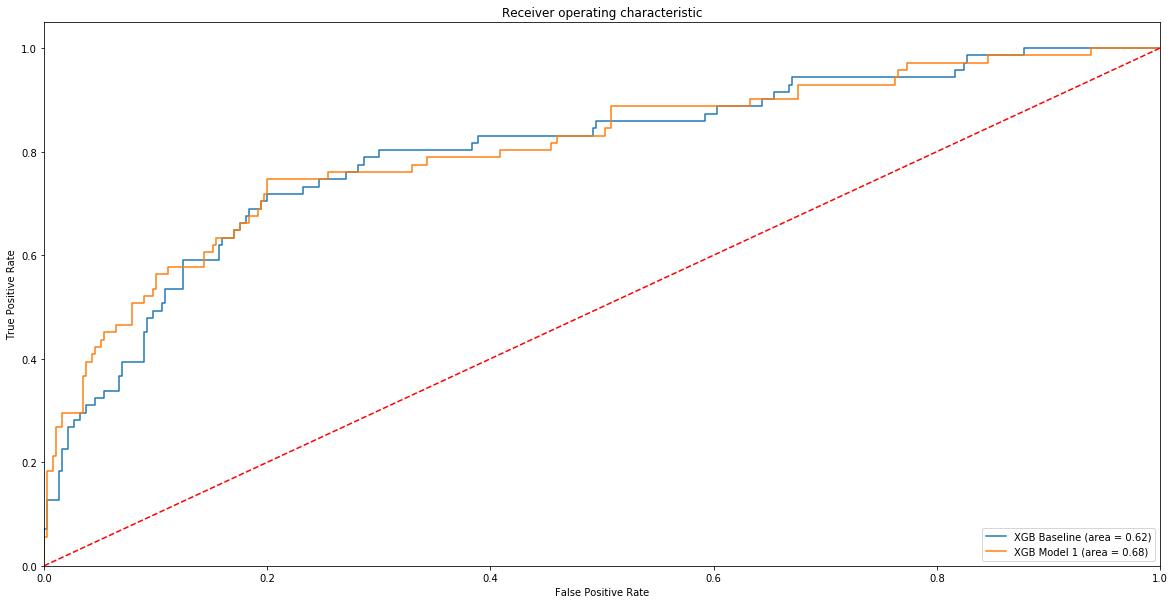

In [42]:
# base
base_xgb_model = GradientBoostingClassifier()
base_xgb_model.fit(X_train,y_train)

# tuning xgboost
xgb_tuning = xg_clf.best_estimator_
xgb_tuning.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
base_xgb_auc = roc_auc_score(y_test, base_xgb_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, base_xgb_model.predict_proba(X_test)[:,1])
#model 1
xgb_tuning_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 

plt.figure(figsize=(20,10))
plt.plot(fprB, tprB, label='XGB Baseline (area = %0.2f)' % base_xgb_auc)
plt.plot(fpr1, tpr1, label='XGB Model 1 (area = %0.2f)' % xgb_tuning_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 투표기반 분류기

In [ ]:
from sklearn.ensemble import VotingClassifier

+ 위에서 분석한 SVM Logistics Regression Gradient Boosting 방법을 종합하여 투표기반 분류기를 통해서 데이터를 분석
    - 투표기반 분류기는 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것입니다.

In [ ]:
log_clf = LogisticRegression(C=1, penalty="l2")
svm_clf = SVM_grid_search.best_estimator_
gbc_clf = tuning.best_estimator_
xgb_clf = xg_clf.best_estimator_

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('gbc', gbc_clf), ('svm', svm_clf)],
                             voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, svm_clf, gbc_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
voting_clf2 = VotingClassifier(estimators=[('lr', log_clf), ('svm', svm_clf)], voting='hard')
voting_clf2.fit(X_train, y_train)

for clf in (log_clf, svm_clf, voting_clf2):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
log_clf = LogisticRegression(C=1, penalty="l2")
svm_clf = SVM_grid_search.best_estimator_
gbc_clf = tuning.best_estimator_
xgb_clf = xg_clf.best_estimator_

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('gbc', gbc_clf), ('svm', svm_clf),('xgb', xgb_clf)],
                             voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, svm_clf, gbc_clf, xgb_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))